In [1]:
##### import numpy as np 
import pandas as pd 
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_curve,roc_auc_score
import matplotlib.pyplot as plt
print("libraries imported...move further") 

libraries imported...move further


In [2]:
df= pd.read_csv('framingham.csv')
print("File read sucessfull")

File read sucessfull


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


In [18]:
df.head(10)

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
5,0,43,2.0,0,0.0,0.0,0,1,0,228.0,180.0,110.0,30.30,77.0,99.0,0
6,0,63,1.0,0,0.0,0.0,0,0,0,205.0,138.0,71.0,33.11,60.0,85.0,1
7,0,45,2.0,1,20.0,0.0,0,0,0,313.0,100.0,71.0,21.68,79.0,78.0,0
8,1,52,1.0,0,0.0,0.0,0,1,0,260.0,141.5,89.0,26.36,76.0,79.0,0
9,1,43,1.0,1,30.0,0.0,0,1,0,225.0,162.0,107.0,23.61,93.0,88.0,0


In [19]:
df.tail()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
4233,1,50,1.0,1,1.0,0.00000,0,1,0,313.0,179.0,92.0,25.97,66.0,86.000000,1
4234,1,51,3.0,1,43.0,0.00000,0,0,0,207.0,126.5,80.0,19.71,65.0,68.000000,0
4235,0,48,2.0,1,20.0,0.02963,0,0,0,248.0,131.0,72.0,22.00,84.0,86.000000,0
4236,0,44,1.0,1,15.0,0.00000,0,0,0,210.0,126.5,87.0,19.16,86.0,81.966753,0
4237,0,52,2.0,0,0.0,0.00000,0,0,0,269.0,133.5,83.0,21.47,80.0,107.000000,0


<Axes: >

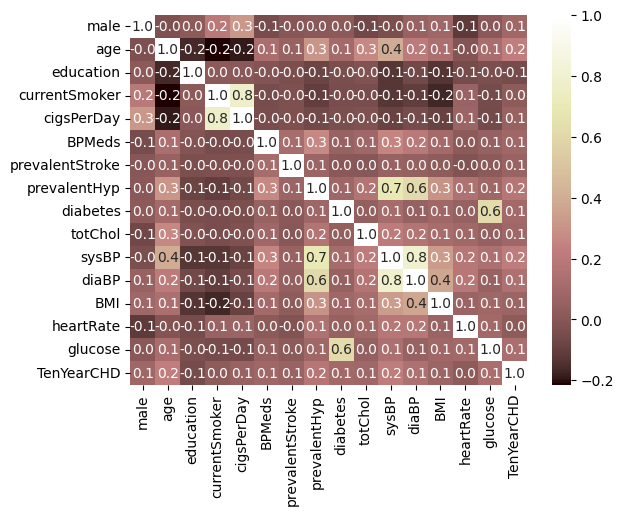

In [5]:
corr_matt=df.corr()
sns.heatmap(corr_matt,annot=True,fmt='0.1f',cmap='pink')

Logistic Reggresion 

In [6]:
nullcount= df.isnull().sum() 
print(nullcount)

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64


In [7]:
df.fillna(df.mean(),inplace=True)
df.isnull().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

### Feature selection

In [8]:
x=df.drop(columns=['TenYearCHD']) #all columns expect TenYearCHD
y=df['TenYearCHD']#Label

In [9]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [10]:
model= LogisticRegression() #model preparation


In [11]:
maxl= LogisticRegression(max_iter=10000) # kaise padhna hai 
model.fit(x_train,y_train) #kya padhna hai 

C:\Users\manas\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [12]:
y_pred = model.predict(x_test)

In [13]:
accuracy = accuracy_score(y_test,y_pred)
print("Accuracy= ",accuracy)

conf_mat=confusion_matrix(y_test,y_pred)
print("\nConfusion Matrix-\n",conf_mat)

class_report=classification_report(y_test,y_pred)
print("\nClassification Report-\n",class_report)

Accuracy=  0.8537735849056604

Confusion Matrix-
 [[1078    6]
 [ 180    8]]

Classification Report-
               precision    recall  f1-score   support

           0       0.86      0.99      0.92      1084
           1       0.57      0.04      0.08       188

    accuracy                           0.85      1272
   macro avg       0.71      0.52      0.50      1272
weighted avg       0.81      0.85      0.80      1272



### 

In [14]:
user_input={
    'male':[int(input("Enter 1 for male, 0 for female"))],
    'age':[int(input("Enter age"))],
    'education':[float(input("Enter education (1-4)"))],
    'currentSmoker':[int(input("Enter 1 for smoke, 0 for noSmoke"))],
    'cigsPerDay':[float(input("Enter no of cigs"))],
    'BPMeds':[float(input("Enter BP"))],
    'prevalentStroke':[int(input("Enter 1 for stroke, 0 for no stroke"))],
    'prevalentHyp':[int(input("Enter 1 for chinta, 0 for no chinta"))],
    'diabetes':[int(input("Enter 1 for diabetes, 0 for no-diabetes"))],
    'totChol':[float(input("Enter cholestrol"))],
    'sysBP':[float(input("Enter sysBP"))],
    'diaBP':[float(input("Enter diaBP"))],
    'BMI':[float(input("Enter BMI"))],
    'heartRate':[float(input("Enter heartrate"))],
    'glucose':[float(input("Enter glucose level"))]
}
user_df=pd.DataFrame(user_input)

Enter 1 for male, 0 for female 0
Enter age 21
Enter education (1-4) 3
Enter 1 for smoke, 0 for noSmoke 0
Enter no of cigs 0
Enter BP 120
Enter 1 for stroke, 0 for no stroke 0
Enter 1 for chinta, 0 for no chinta 1
Enter 1 for diabetes, 0 for no-diabetes 0
Enter cholestrol 225
Enter sysBP 120
Enter diaBP 80
Enter BMI 20
Enter heartrate 62
Enter glucose level 70


In [16]:
pred_user=model.predict(user_df)
print("chance of CHD",pred_user)

chance of CHD [1]


###### 

#### 